<img src="https://hips.hearstapps.com/hmg-prod/images/close-up-of-speedometer-and-gas-gauge-royalty-free-image-1585163706.jpg" width="800"/>

# MPG

DataSet con el rendimiento de los vehículos en términos de millas por galón (miles per gallon, MPG). Este archivo contiene información sobre diferentes características de los automóviles.

## Librerías

In [1]:
# Tratamiento de datos
import numpy as np
import pandas as pd

# Gráficos
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.graph_objects as go
import scipy.stats as stats
# Estadísticas
from scipy.stats import f_oneway,pearsonr, ttest_ind, ttest_rel, shapiro, levene, mannwhitneyu, kruskal, chi2_contingency
import warnings
warnings.filterwarnings('ignore')
import sys
import os

## Carga de Datos

In [2]:
# # Ruta relativa desde el directorio actual
relative_path = '../../../'
# os.chdir(relative_path)


In [3]:
mpg = pd.read_csv(r'0-ComplementaryResourses\eda_mpg\data\raw\mpg.csv')

## Primera Exploración

In [4]:
df = mpg.copy()

In [5]:
df.head()

,mpg,cylinders,displacement,horsepower,weight,acceleration,model_year,origin,name
0,18.0,8,307.0,130,3504,12.0,70,1,chevrolet chevelle malibu
1,15.0,8,350.0,165,3693,11.5,70,1,buick skylark 320
2,18.0,8,318.0,150,3436,11.0,70,1,plymouth satellite
3,16.0,8,304.0,150,3433,12.0,70,1,amc rebel sst
4,17.0,8,302.0,140,3449,10.5,70,1,ford torino


In [6]:
df.tail()

,mpg,cylinders,displacement,horsepower,weight,acceleration,model_year,origin,name
393,27.0,4,140.0,86,2790,15.6,82,1,ford mustang gl
394,44.0,4,97.0,52,2130,24.6,82,2,vw pickup
395,32.0,4,135.0,84,2295,11.6,82,1,dodge rampage
396,28.0,4,120.0,79,2625,18.6,82,1,ford ranger
397,31.0,4,119.0,82,2720,19.4,82,1,chevy s-10


In [7]:
df.shape

(398, 9)

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 398 entries, 0 to 397
Data columns (total 9 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   mpg           398 non-null    float64
 1   cylinders     398 non-null    int64  
 2   displacement  398 non-null    float64
 3   horsepower    398 non-null    object 
 4   weight        398 non-null    int64  
 5   acceleration  398 non-null    float64
 6   model_year    398 non-null    int64  
 7   origin        398 non-null    int64  
 8   name          398 non-null    object 
dtypes: float64(3), int64(4), object(2)
memory usage: 28.1+ KB


In [9]:
df.isnull().sum()

mpg             0
cylinders       0
displacement    0
horsepower      0
weight          0
acceleration    0
model_year      0
origin          0
name            0
dtype: int64

Se puede observar que los datos están compuestos por 398 filas y 9 columnas, las cuales son: 

|Variable|Descripción|
|---|---|
|mpg| Millas por galón, que indica la eficiencia del combustible del vehículo.|
|cylinders| Número de cilindros en el motor del vehículo.|
|displacement| Desplazamiento del motor en pulgadas cúbicas.|
|horsepower| Potencia del motor medida en caballos de fuerza.|
|weight| Peso del vehículo en libras.|
|acceleration| Tiempo que le toma al vehículo acelerar de 0 a 60 millas por hora.|
|model_year| Año del modelo del vehículo.|
|origin| Origen del vehículo (codificado como 1 para América, 2 para Europa y 3 para Asia).|
|name| Nombre del vehículo o modelo específico.|

In [10]:
df.describe()

,mpg,cylinders,displacement,weight,acceleration,model_year,origin
count,398.000000,398.000000,398.000000,398.000000,398.000000,398.000000,398.000000
mean,23.514573,5.454774,193.425879,2970.424623,15.568090,76.010050,1.572864
std,7.815984,1.701004,104.269838,846.841774,2.757689,3.697627,0.802055
min,9.000000,3.000000,68.000000,1613.000000,8.000000,70.000000,1.000000
25%,17.500000,4.000000,104.250000,2223.750000,13.825000,73.000000,1.000000
50%,23.000000,4.000000,148.500000,2803.500000,15.500000,76.000000,1.000000
75%,29.000000,8.000000,262.000000,3608.000000,17.175000,79.000000,2.000000
max,46.600000,8.000000,455.000000,5140.000000,24.800000,82.000000,3.000000


In [11]:
df.describe(include='object')

,horsepower,name
count,398,398
unique,94,305
top,150,ford pinto
freq,22,6


## Análisis Inicial

In [12]:
# Calcular la cardinalidad de cada columna
cardinalidades = df.nunique()
cardinalidades_porcentaje = (df.nunique() / len(df)) * 100
# Clasificar usando map y lambda
categorias = cardinalidades.map(lambda x: 'Baja' if x < 10 else ('Media' if x <= 50 else 'Alta'))
cardinalidad=pd.DataFrame({'card_abs':cardinalidades,'card_relat(%)':cardinalidades_porcentaje,'Tipo':categorias})
cardinalidad

,card_abs,card_relat(%),Tipo
mpg,129,32.412060,Alta
cylinders,5,1.256281,Baja
displacement,82,20.603015,Alta
horsepower,94,23.618090,Alta
weight,351,88.190955,Alta
acceleration,95,23.869347,Alta
model_year,13,3.266332,Media
origin,3,0.753769,Baja
name,305,76.633166,Alta


Existen 4 columnas numéricas continuas, 3 numéricas discretas, y dos categóricas nominales, de las cuales no tiene mucho sentido que horsepower sea nominal ya que debería ser discreta con una alta cardinalidad y model_year debería ser categórica ordinal.

In [13]:
df['origin'] = df['origin'].astype('category')
df['model_year'] = df['model_year'].astype('category')

Si observamos el cuadro de info inicial, vemos que horsepower aparece como object, esto es una señal de que algo puede estar mal.

In [14]:
df['horsepower'] = pd.to_numeric(df['horsepower'], errors='coerce')#Recordar que el parametro errors='coerce' convierte los valores no numéricos en NaN. Esto te permite identificar los valores que no son numéricos con mayor facilidad.

In [15]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 398 entries, 0 to 397
Data columns (total 9 columns):
 #   Column        Non-Null Count  Dtype   
---  ------        --------------  -----   
 0   mpg           398 non-null    float64 
 1   cylinders     398 non-null    int64   
 2   displacement  398 non-null    float64 
 3   horsepower    392 non-null    float64 
 4   weight        398 non-null    int64   
 5   acceleration  398 non-null    float64 
 6   model_year    398 non-null    category
 7   origin        398 non-null    category
 8   name          398 non-null    object  
dtypes: category(2), float64(4), int64(2), object(1)
memory usage: 23.4+ KB


Al convertirla a numérica se oberva que hay 6 valores problematicos en horsepower:

In [16]:
df[df['horsepower'].isnull()]

,mpg,cylinders,displacement,horsepower,weight,acceleration,model_year,origin,name
32,25.0,4,98.0,NaN,2046,19.0,71,1,ford pinto
126,21.0,6,200.0,NaN,2875,17.0,74,1,ford maverick
330,40.9,4,85.0,NaN,1835,17.3,80,2,renault lecar deluxe
336,23.6,4,140.0,NaN,2905,14.3,80,1,ford mustang cobra
354,34.5,4,100.0,NaN,2320,15.8,81,2,renault 18i
374,23.0,4,151.0,NaN,3035,20.5,82,1,amc concord dl


Esta conversión ha generado algunos nan pero aún estamos explorando, no estamos transformando los datos

In [17]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 398 entries, 0 to 397
Data columns (total 9 columns):
 #   Column        Non-Null Count  Dtype   
---  ------        --------------  -----   
 0   mpg           398 non-null    float64 
 1   cylinders     398 non-null    int64   
 2   displacement  398 non-null    float64 
 3   horsepower    392 non-null    float64 
 4   weight        398 non-null    int64   
 5   acceleration  398 non-null    float64 
 6   model_year    398 non-null    category
 7   origin        398 non-null    category
 8   name          398 non-null    object  
dtypes: category(2), float64(4), int64(2), object(1)
memory usage: 23.4+ KB


En las variables numéricas podemos observar que solo aceleración tiene una distribución parecida a la *normal* mientras que model_year y origin tienen distribuciones asociadas a variables categórica que por el momento no interesa analizar.   

Primero analizaremos gráficamente las variables numéricas:

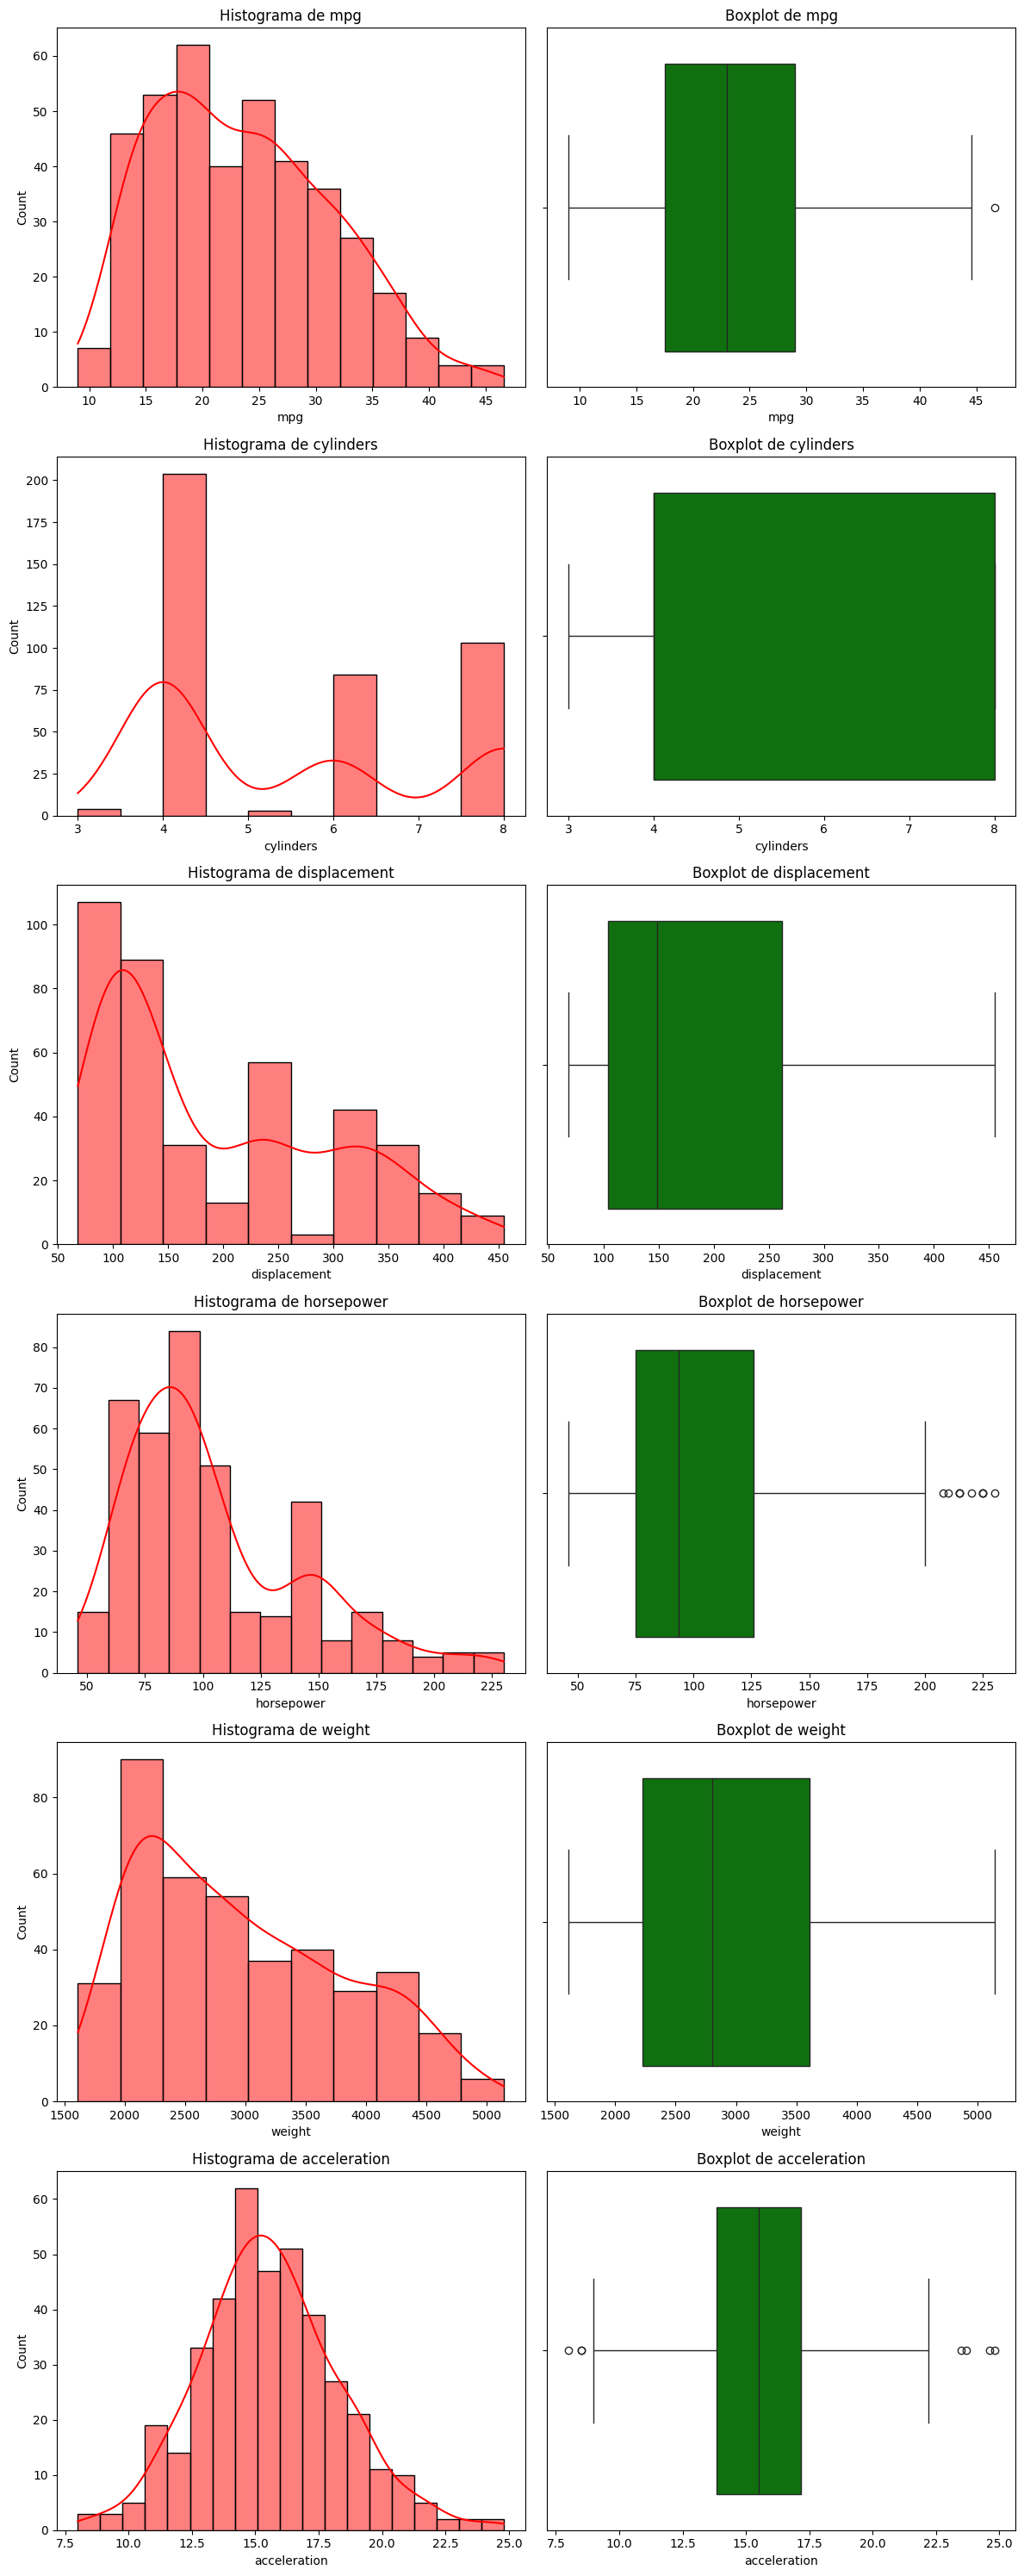

In [18]:
# Filtrar columnas numéricas y categóricas
numeric_columns = df.select_dtypes(include=['float64', 'int64']).columns

# Configuración general del gráfico
fig, axes = plt.subplots(len(numeric_columns) , 2, figsize=(12, 5 * (len(numeric_columns) )),)

# Graficar para columnas numéricas
for idx, column in enumerate(numeric_columns):
    # Histograma
    sns.histplot(df[column], kde=True, ax=axes[idx, 0], color='red')
    axes[idx, 0].set_title(f'Histograma de {column}')
    
    # Boxplot horizontal
    sns.boxplot(x=df[column], ax=axes[idx, 1], color='green')
    axes[idx, 1].set_title(f'Boxplot de {column}')


# Ajustar espaciado
plt.tight_layout()
plt.savefig(r'0-ComplementaryResourses\eda_mpg\reports\figures\histogram_boxplot_numeric_columns.png')
plt.show()

### Análisis de gráficos
- Variable mpg:
    - Histograma y KDE de mpg:
        - El histograma muestra la distribución de millas por galón (mpg) de los autos en el dataset.
        - La mayoría de los autos tienen un mpg entre 15 y 30.
        - La curva KDE sugiere una distribución ligeramente sesgada a la derecha.
    - Boxplot de mpg:
        - El boxplot confirma que la mediana de mpg está alrededor de 23.
        - Hay un outlier por encima de 45 mpg.

- Variable cylinders:
    - Histograma y KDE de cylinders:
        - La mayoría de los autos tienen 4 cilindros, seguidos por 8 y luego 6 cilindros.
        - Hay pocos autos con 3 y 5 cilindros.
        - La curva KDE muestra múltiples picos, lo que sugiere que los cilindros tienen valores discretos específicos.
    - Boxplot de cylinders:
        - La mayoría de los autos tienen entre 4 y 8 cilindros.
        - No hay outliers significativos.

- Variable displacement:
    - Histograma y KDE de displacement:
        - La mayoría de los autos tienen una cilindrada (displacement) entre 100 y 200.
        - La distribución tiene una cola larga hacia la derecha.
        - La curva KDE muestra varios picos, indicando grupos dentro del rango.
    - Boxplot de displacement:
        - La mediana está alrededor de 150.
        - Hay una amplia variación en la cilindrada, desde 50 hasta 450.

- Variable horsepower:
    - Histograma y KDE de horsepower:
        - La mayoría de los autos tienen entre 50 y 150 caballos de fuerza.
        - La distribución tiene una cola larga hacia la derecha.
        - La curva KDE muestra un pico principal alrededor de 100.
    - Boxplot de horsepower:
        - La mediana está cerca de 100.
        - Hay varios outliers por encima de 200 caballos de fuerza.

- Variable weight:
    - Histograma y KDE de weight:
        - La mayoría de los autos pesan entre 2000 y 3500 libras.
        - La distribución tiene una cola larga hacia la derecha.
        - La curva KDE muestra un pico principal alrededor de 2500.
    - Boxplot de weight:
        - La mediana está cerca de 3000 libras.
        - Hay una amplia variación en el peso, desde 1500 hasta 5000 libras.

- Variable acceleration:
    - Histograma y KDE de acceleration:
        - La mayoría de los autos tienen una aceleración entre 10 y 20 segundos.
        - La distribución es aproximadamente simétrica.
        - La curva KDE muestra un pico principal alrededor de 15.
    - Boxplot de acceleration:
        - La mediana está cerca de 15.
        - Hay algunos outliers por debajo de 10 y por encima de 22.


Ahora examinaremos a las variables categóricas:

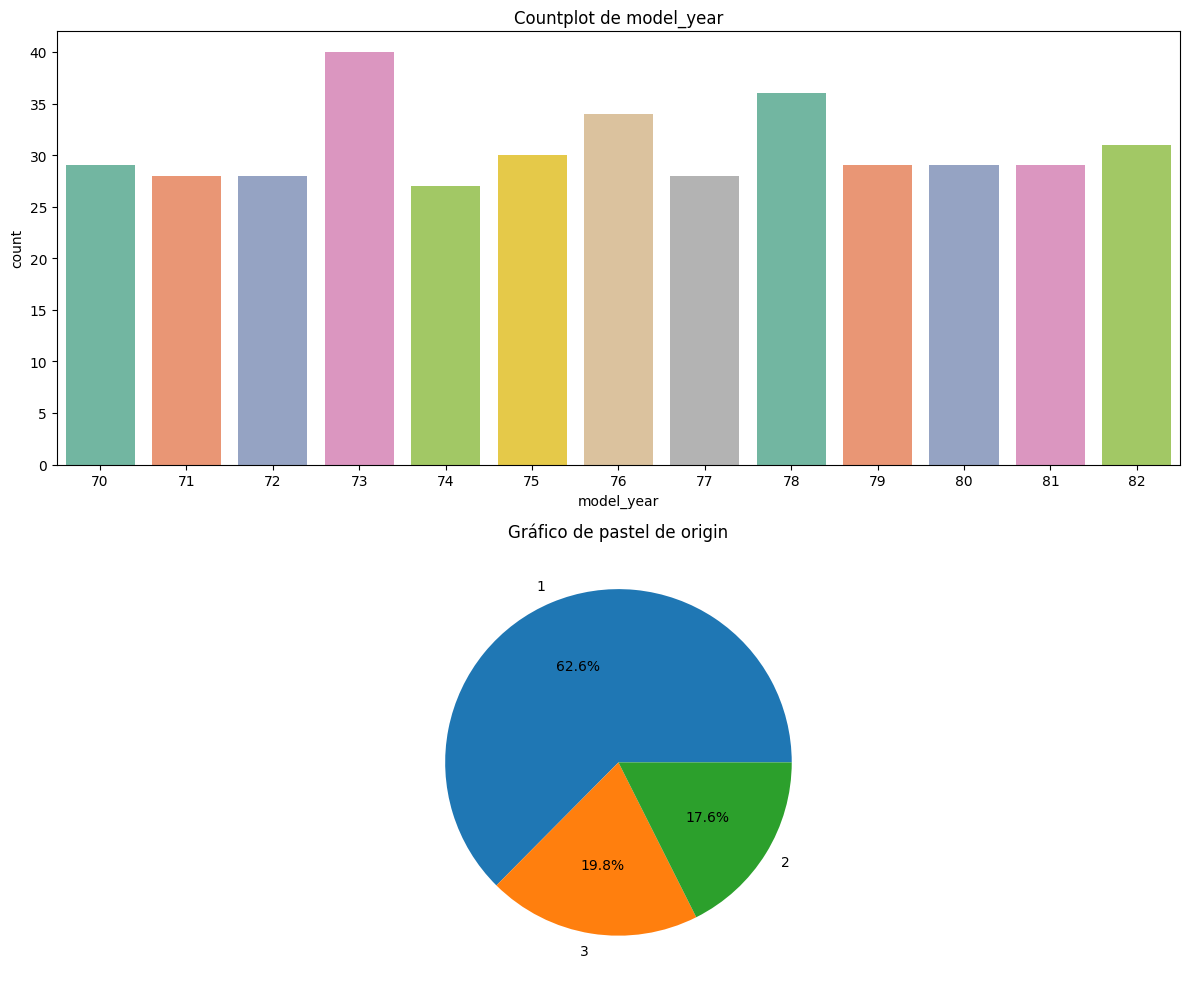

In [19]:
# Seleccionar las columnas categóricas
categorical_columns = df.select_dtypes(include=['category']).columns

# Crear una figura para los gráficos
fig, axes = plt.subplots(len(categorical_columns), 1, figsize=(12, 5 * len(categorical_columns)))

# Graficar para columnas categóricas
for idx, column in enumerate(categorical_columns):  # Usamos idx para iterar
    unique_values = df[column].nunique()  # Número de valores únicos
    
    if unique_values < 5:#Establecer un umbral para el número de valores únicos para decidir si hacer un piechart o un countplot. Es una elección personal
        # Gráfico de pastel (pie chart)
        value_counts = df[column].value_counts()
        axes[idx].pie(value_counts, labels=value_counts.index, autopct='%1.1f%%')
        axes[idx].set_title(f'Gráfico de pastel de {column}')
    else:
        # Si quieres hacer un countplot en lugar del piechart, se puede hacer aquí
        sns.countplot(data=df, x=column, ax=axes[idx], palette='Set2')
        axes[idx].set_title(f'Countplot de {column}')

# Ajustar espaciado
plt.tight_layout()
plt.savefig(r'0-ComplementaryResourses\eda_mpg\reports\figures\piechart_countplot_categorical_columns.png')
plt.show()

- Variable model_year:
    - Gráfico de Barras de model_year:
        - Muestra la cantidad de autos por año de modelo.
        - El año 73 tiene la mayor cantidad de autos, seguido por el 78 y el 76.

- Variable origin:        
    - Gráfico de Dona de origin:
        - Representa las proporciones de autos por origen.
        - Origen 1 es el dominante con el 62.6%, seguido de origen 3 con el 19.8% y origen 2 con el 17.6%.


## Limpieza

- Outliers: Las variables `mpg`, `horsepower` y `acceleration` presentan algunos outliers.
- Errores: La variable ``horsepower`` presentaba un error o una imputación no correcta (`?`) que fue modificada antes y reemplazada por NaNs.
- Missing: La variable `horsepower` tiene 6 NaNs que deben ser tratados.

En este caso, como se mencionó en clase tenemos muchas opciones para imputar el valor de los 6 nan de horsepower. Aquí te dejo algunos criterios de imputación. La decisión es tuya en base a tu criterio y/o del negocio(En este ejemplo podemos entender que el nogecio pue comprender al área comercial y o técnica de la empresa que tiene el conocimiento técnico). Hay que entender en este momento que si eliges una estrategias y posteriormente te arrepientes por los resultados que encuentras, puedes volver a este punto ya que df1 es una copia. Por eso la importancia de hacer copias.


### 1. **Promedio de la Columna General**
   - **Cuándo usarlo**: Si la distribución de `horsepower` es aproximadamente normal y no hay patrones obvios relacionados con otras variables.
   - **Justificación técnica**: Es una solución sencilla y eficaz cuando la cantidad de valores faltantes es pequeña.

   ```python
   df['horsepower'].fillna(df['horsepower'].mean(), inplace=True)
   ```


### 2. **Mediana de la Columna**
   - **Cuándo usarlo**: Si la distribución de `horsepower` es asimétrica (sesgada) o tiene outliers significativos.
   - **Justificación técnica**: La mediana es robusta frente a valores extremos y puede ser más representativa en distribuciones sesgadas.

   ```python
   df['horsepower'].fillna(df['horsepower'].median(), inplace=True)
   ```


### 3. **Media Agrupada por Segmentos Relevantes**
   - **Cuándo usarlo**: Si hay una relación clara entre `horsepower` y otras variables categóricas o continuas, como el `cylinders` (cilindros) o el `origin` (origen del auto).
   - **Justificación técnica**: Segmentar y usar la media dentro de cada grupo mejora la precisión al reflejar patrones del negocio.

   ```python
   df['horsepower'] = df.groupby('cylinders')['horsepower'].transform(lambda x: x.fillna(x.mean()))
   ```


### 4. **Regresión para Predicción**
   - **Cuándo usarlo**: Si se dispone de un conjunto significativo de variables predictoras relacionadas con `horsepower`, como `weight`, `displacement`, o `acceleration`.
   - **Justificación técnica**: Un modelo de regresión puede estimar los valores faltantes con alta precisión basándose en patrones subyacentes del dataset.

   ```python
   from sklearn.linear_model import LinearRegression

   # Selección de filas completas y faltantes
   complete_data = df.dropna(subset=['horsepower'])
   missing_data = df[df['horsepower'].isna()]

   # Variables predictoras
   predictors = ['weight', 'displacement', 'acceleration']

   # Entrenamiento del modelo
   model = LinearRegression()
   model.fit(complete_data[predictors], complete_data['horsepower'])

   # Imputación de valores
   df.loc[df['horsepower'].isna(), 'horsepower'] = model.predict(missing_data[predictors])
   ```


### 5. **Uso de Reglas del Negocio**
   - **Cuándo usarlo**: Si hay reglas específicas basadas en la experiencia del negocio que indican rangos típicos para vehículos con ciertas características.
   - **Ejemplo de regla**: Si el auto tiene menos de 4 cilindros, `horsepower` probablemente esté en un rango bajo (e.g., <100). Si tiene más de 8 cilindros, está en un rango alto (>200).
   - **Justificación técnica**: Esto incorpora conocimiento experto directamente en la imputación.

   ```python
   df.loc[(df['horsepower'].isna()) & (df['cylinders'] < 4), 'horsepower'] = 90  # Rango bajo
   df.loc[(df['horsepower'].isna()) & (df['cylinders'] >= 8), 'horsepower'] = 250  # Rango alto
   ```


### 6. **Imputación por Vecindad (KNN Imputation)**
   - **Cuándo usarlo**: Si el dataset es suficientemente grande y otras variables, como `weight`, `displacement`, o `acceleration`, tienen patrones claros de similitud con `horsepower`.
   - **Justificación técnica**: Encuentra los valores faltantes basándose en la similitud con registros completos.

   ```python
   from sklearn.impute import KNNImputer

   imputer = KNNImputer(n_neighbors=5)
   df[['horsepower']] = imputer.fit_transform(df[['horsepower', 'weight', 'displacement', 'acceleration']])
   ```


### IMPORTANTE!!!
La estrategia ideal depende de:
- La cantidad y proporción de valores faltantes en `horsepower`.
- La relación de `horsepower` con otras variables.
- La distribución estadística de los datos y los patrones observados.



Repasando nuevamente la distribución de la columna, podemos decir que tiene una districión que puede tener problemas de simetría y kurtosis; y por ende no tiene el comportamiento de una distrbución normal. Por ejemplo aquí voy a crear un copia del df para comparar el antes y despues de hacer una imputación por mediana

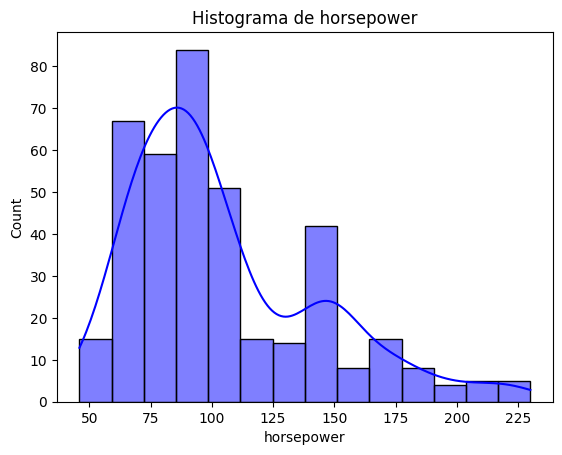

In [20]:
sns.histplot(df['horsepower'], kde=True, color='blue')
plt.title('Histograma de horsepower')
plt.savefig(r'0-ComplementaryResourses\eda_mpg\reports\figures\histogram_horsepower.png')
plt.show()

Como buena práctica, generamos la copia de df y probamos la imputación que elegimos

In [21]:
df1=df.copy()#Vamos a  usar esta copia para imputar los valores faltantes y tambien para los futuros cálculos
df1.to_csv(r'0-ComplementaryResourses\eda_mpg\data\processed\mpg_processed.csv', index=False)

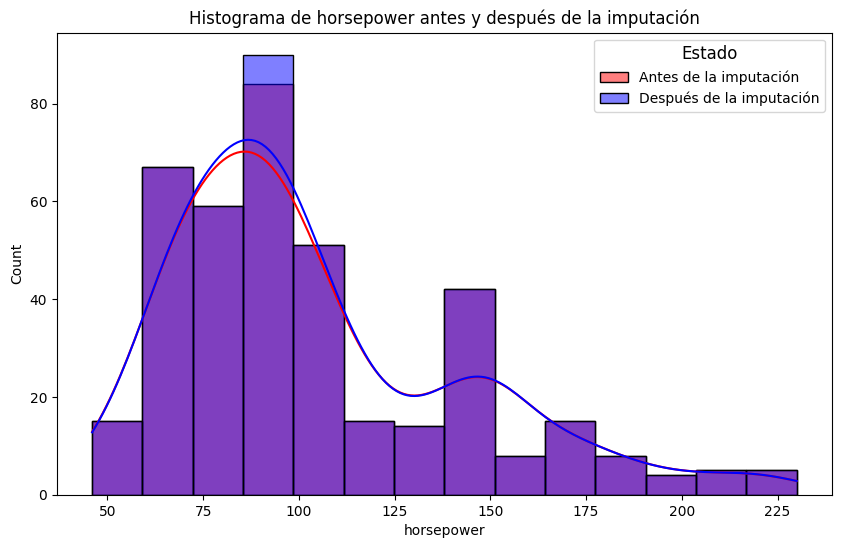

In [22]:

df1['horsepower']=df1['horsepower'].fillna(df1['horsepower'].median())
# Configurar el gráfico
plt.figure(figsize=(10, 6))
sns.histplot(df['horsepower'], kde=True, color='red', label='Antes de la imputación', )
sns.histplot(df1['horsepower'], kde=True, color='blue', label='Después de la imputación',)
plt.legend(title='Estado', fontsize=10, title_fontsize=12)
plt.title('Histograma de horsepower antes y después de la imputación')
plt.savefig(r'0-ComplementaryResourses\eda_mpg\reports\figures\histogram_horsepower_imputation.png')
plt.show()

Gráficamente es posible que no se perciba el resultado de la imputación, pero si observamos sus datos estadísticos, podemos notar las diferencias.

In [23]:
pd.concat([df1['horsepower'].describe(), df['horsepower'].describe()],axis=1, keys=['Después de la imputación', 'Antes de la imputación'])

,Después de la imputación,Antes de la imputación
count,398.000000,392.000000
mean,104.304020,104.469388
std,38.222625,38.491160
min,46.000000,46.000000
25%,76.000000,75.000000
50%,93.500000,93.500000
75%,125.000000,126.000000
max,230.000000,230.000000


## Análisis Exploratorio

Un pairplot es una buena forma de ver las relaciones o patrones gráficos bivariantes que tienen las variables.Recuerda que dependiendo de la cantidad de columnas que tengas, este proceso puede tardar más o menos.En el dataframe teneoms 2 variables categóricas, Para este grafico vamos a usar origin porque unicamente tiene 3 grupos y resulta más sencillo analizar algunos patrones.

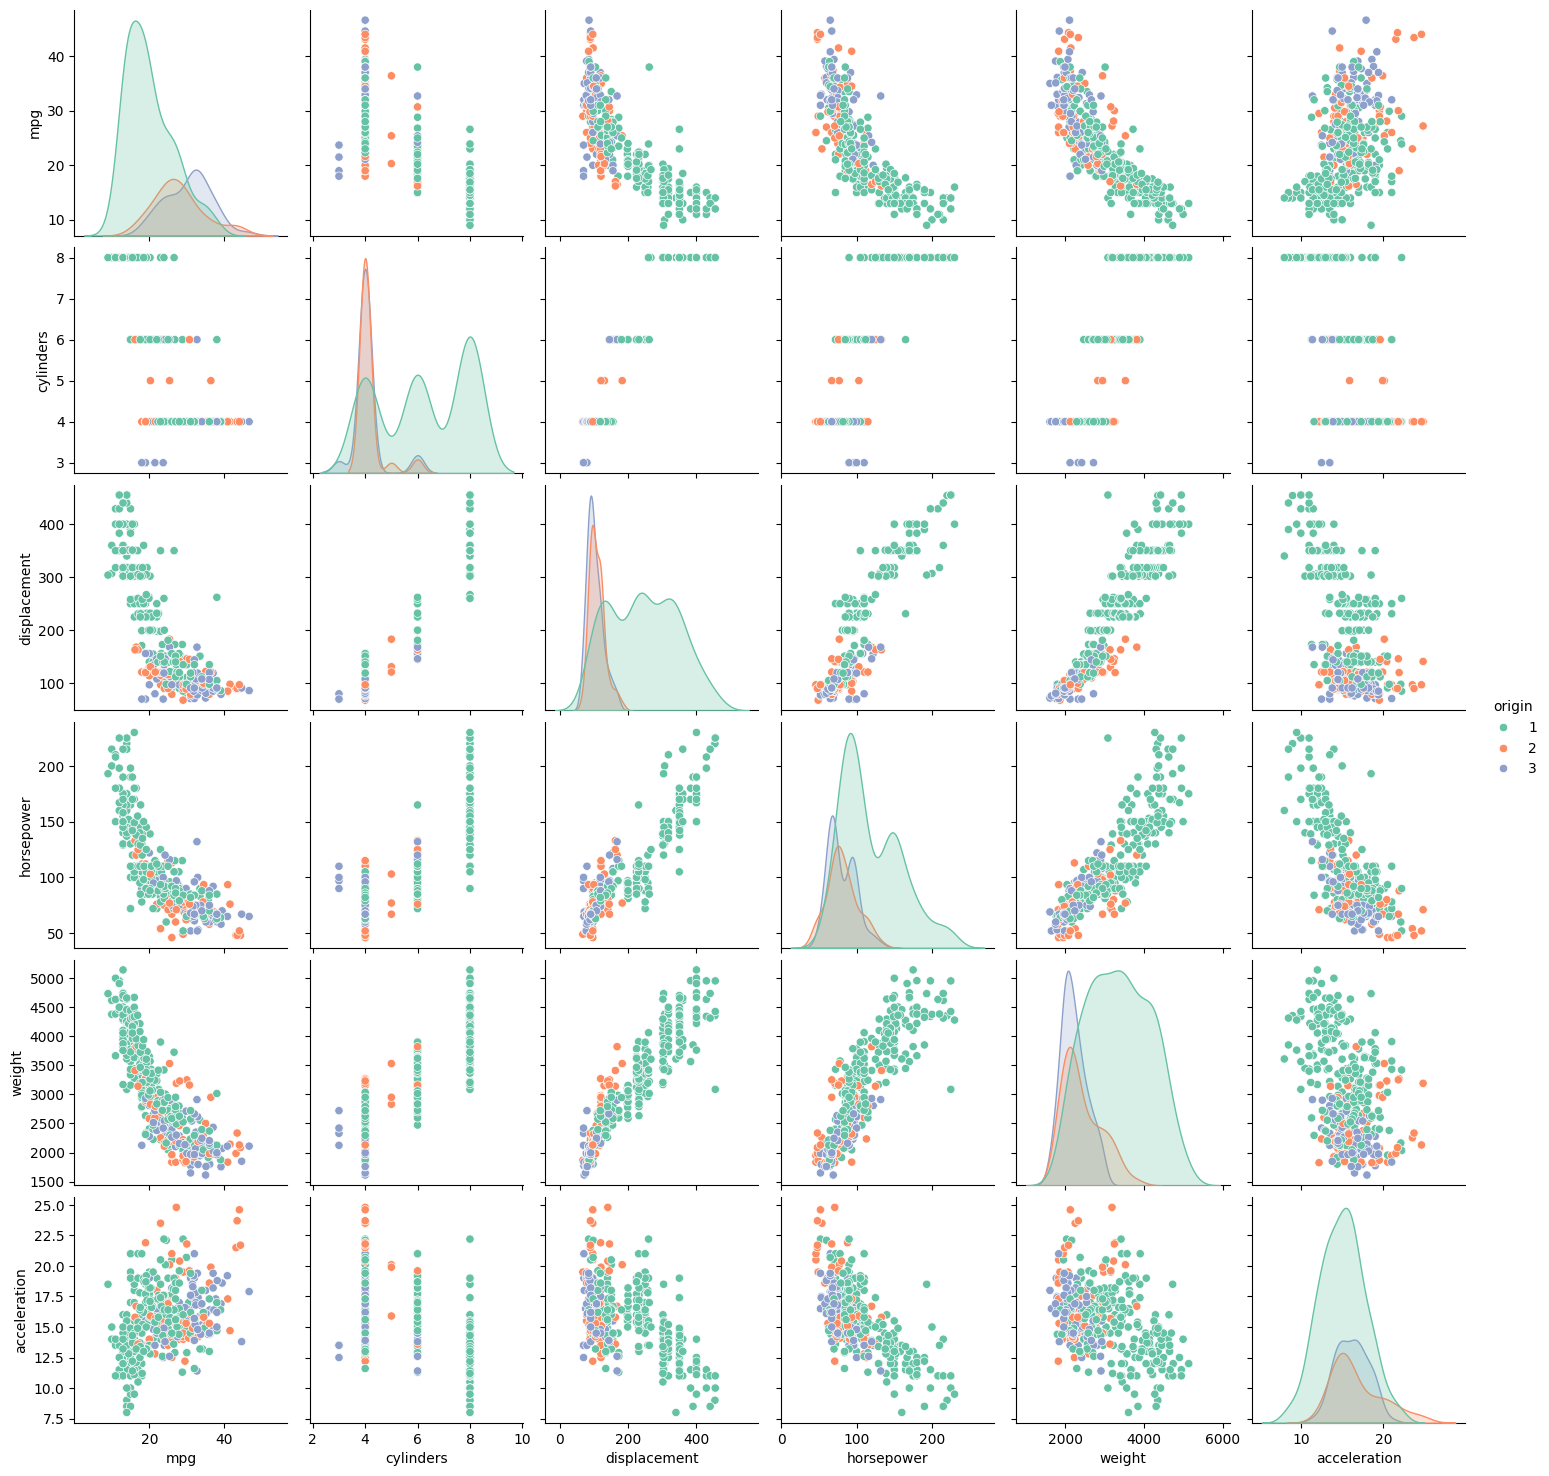

In [24]:
sns.pairplot(df1,hue='origin',palette='Set2') 
plt.savefig(r'0-ComplementaryResourses\eda_mpg\reports\figures\pairplot_origin.png')

Otra herramienta para identificar posibles relaciones es a través del heatmap o mapa de calor o mapa de correlaciones. Recordemos que un signo positivo denota una relación directa entre variable y un signo negativo una relación inversa. A mayor valor, la relación es de mayor intensidad. No confundir con causalidad.

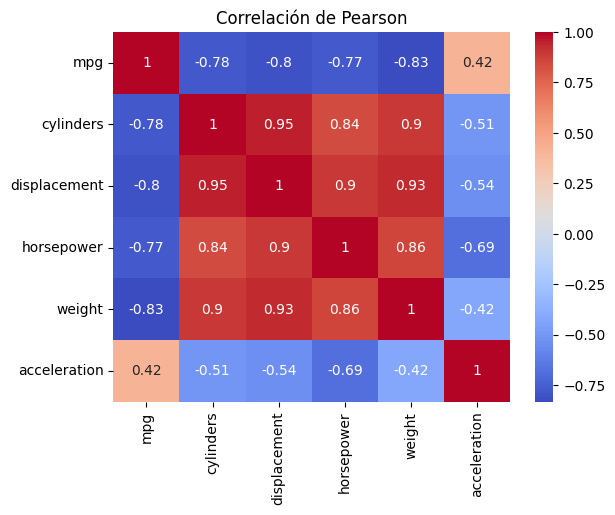

In [25]:
sns.heatmap(df1.corr(numeric_only=True), annot=True, cmap='coolwarm')
plt.title('Correlación de Pearson')
plt.savefig(r'0-ComplementaryResourses\eda_mpg\reports\figures\heatmap_correlation.png')

Algunas pistas de los gráficos, pueden ser las correlaciones que existen entre variables, el comportamiento de sus distribuciones, entre otros. Vamos a entrar en el análisis de algunos patrones a través de preguntas que un analista de datos podría hacerse:

#### **Primera mirada de MPG**

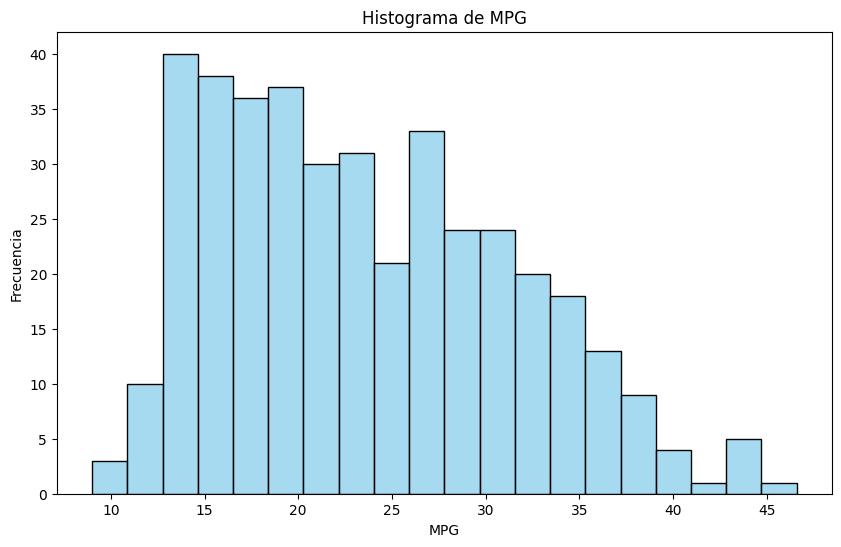

In [26]:
# Histograma de 'mpg'
plt.figure(figsize=(10, 6))
sns.histplot(df1['mpg'], kde=False, color='skyblue', bins=20)
plt.title('Histograma de MPG')
plt.xlabel('MPG')
plt.ylabel('Frecuencia')
plt.savefig(r'0-ComplementaryResourses\eda_mpg\reports\figures\histogram_mpg.png')
plt.show()


Validaremos visualmente usando la Q-Q plot si la distribución tiene un comportamiento normal

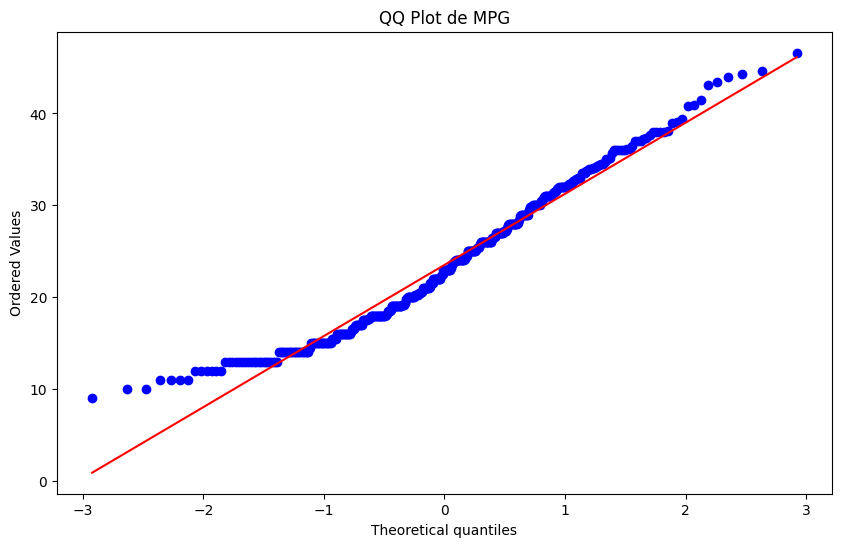

In [27]:
# QQ plot de 'mpg'
plt.figure(figsize=(10, 6))
stats.probplot(df1['mpg'], dist="norm", plot=plt)
plt.title('QQ Plot de MPG')
plt.savefig(r'0-ComplementaryResourses\eda_mpg\reports\figures\qqplot_mpg.png')
plt.show()


#### **La relación entre el peso del vehículo y el consumo de combustible**
¿Qué observaciones puedes hacer sobre la relación entre el peso del vehículo y las millas por galón (MPG)?  

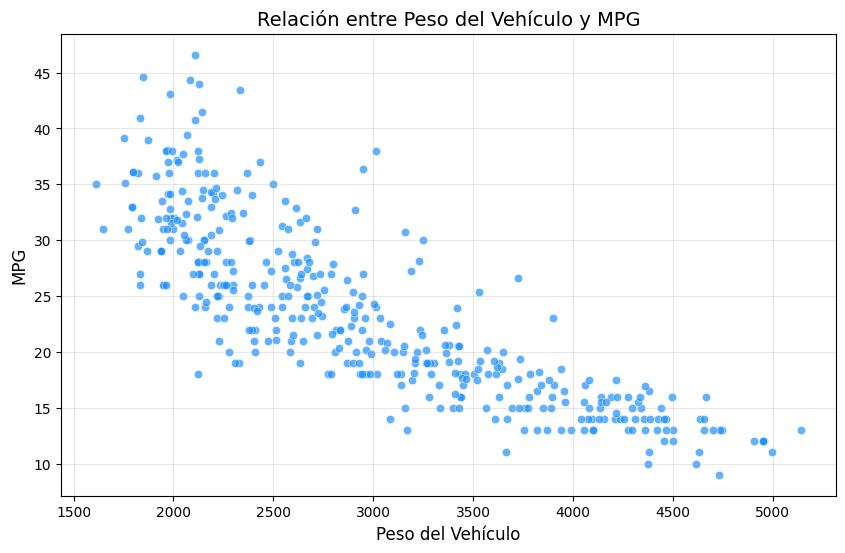

In [28]:
# Gráfico de dispersión
plt.figure(figsize=(10, 6))
sns.scatterplot(data=df1, x='weight', y='mpg', alpha=0.7, color='dodgerblue')
plt.title('Relación entre Peso del Vehículo y MPG', fontsize=14)
plt.xlabel('Peso del Vehículo', fontsize=12)
plt.ylabel('MPG', fontsize=12)
plt.grid(alpha=0.3)
plt.savefig(r'0-ComplementaryResourses\eda_mpg\reports\figures\scatterplot_weight_mpg.png')
plt.show()


Observamos una relación inversa: a mayor peso del vehículo, menor es el MPG. Esto sugiere que vehículos más pesados tienden a ser menos eficientes en consumo de combustible.

#### **Rendimiento de vehículos con diferentes números de cilindros**

Hay diferencias significativas en el MPG entre los vehículos con diferentes números de cilindros.


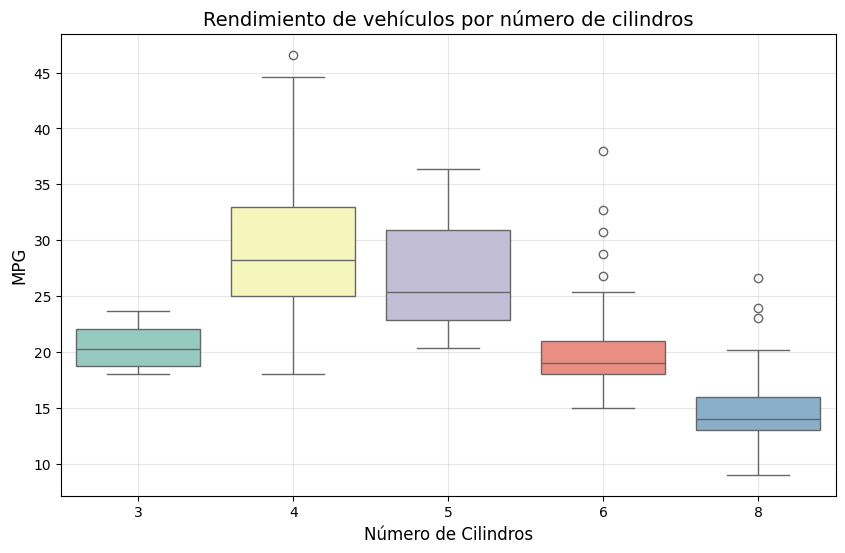

In [29]:
# Filtrar los vehículos según el número de cilindros
mpg_4_cyl = df1[df1['cylinders'] == 4]['mpg']
mpg_6_cyl = df1[df1['cylinders'] == 6]['mpg']
mpg_8_cyl = df1[df1['cylinders'] == 8]['mpg']

# Realizar la prueba ANOVA
stat, p_value = f_oneway(mpg_4_cyl, mpg_6_cyl, mpg_8_cyl)

# Interpretar los resultados
if p_value < 0.05:
    print("Hay diferencias significativas en el MPG entre los vehículos con diferentes números de cilindros.")
else:
    print("No hay diferencias significativas en el MPG entre los vehículos con diferentes números de cilindros.")

# Graficar los resultados
plt.figure(figsize=(10, 6))
sns.boxplot(x='cylinders', y='mpg', data=df1, palette='Set3')
plt.title('Rendimiento de vehículos por número de cilindros', fontsize=14)
plt.xlabel('Número de Cilindros', fontsize=12)
plt.ylabel('MPG', fontsize=12)
plt.grid(True, alpha=0.3)
plt.savefig(r'0-ComplementaryResourses\eda_mpg\reports\figures\boxplot_cylinders_mpg.png')
plt.show()

#### **Comparación del MPG entre vehículos con 4 y 6 cilindros**
¿Hay una diferencia estadísticamente significativa en el MPG promedio entre vehículos con 4 y 6 cilindros?  

In [30]:
# Filtrar datos
mpg_4_cyl = df1[df1['cylinders'] == 4]['mpg']
mpg_6_cyl = df1[df1['cylinders'] == 6]['mpg']

# Prueba t
t_stat, p_value = ttest_ind(mpg_4_cyl, mpg_6_cyl, equal_var=False)

print(f"Estadístico t: {t_stat:.2f}, Valor p: {p_value:.4f}")


Estadístico t: 16.13, Valor p: 0.0000



La prueba t indica si existe una diferencia estadísticamente significativa entre el MPG promedio de vehículos con 4 y 6 cilindros. Un valor p < 0.05 respaldaría esta diferencia.




#### **Comparación del MPG entre diferentes tipos de cilindros**
¿Existen diferencias significativas en el MPG promedio entre vehículos con 4, 6 y 8 cilindros?  


In [31]:
# Agrupar por cilindros
mpg_8_cyl = df1[df1['cylinders'] == 8]['mpg']

# ANOVA
f_stat, p_value = f_oneway(mpg_4_cyl, mpg_6_cyl, mpg_8_cyl)

print(f"Estadístico F: {f_stat:.2f}, Valor p: {p_value:.4f}")


Estadístico F: 345.12, Valor p: 0.0000


El análisis ANOVA permite identificar diferencias significativas entre más de dos grupos. Si el valor p es < 0.05, confirmaría la existencia de diferencias.

#### **Variación del MPG en en tiempo**
¿Qué tendencias se observan en el MPG promedio a lo largo de los años?  

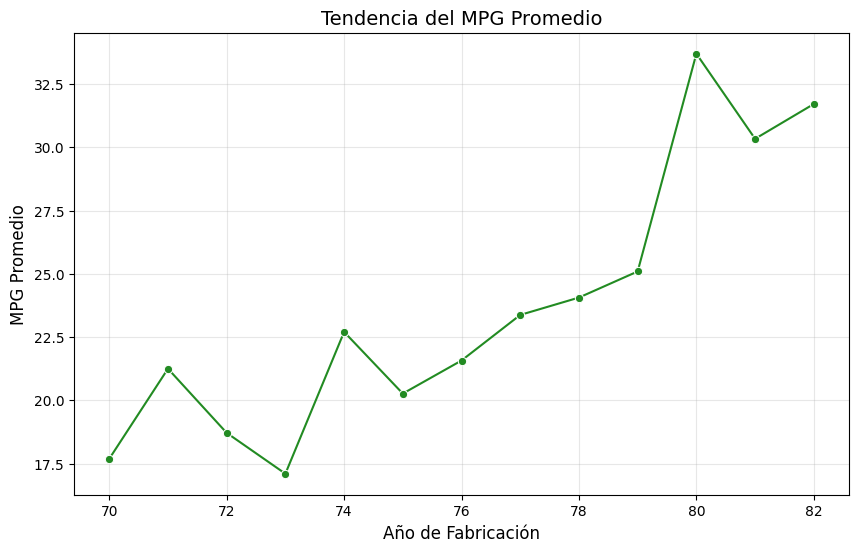

In [32]:
# Filtrar datos de los años 80
df1['model_year'] = pd.to_numeric(df1['model_year'])
mpg_trend = df1.groupby('model_year')['mpg'].mean()

# Gráfico de líneas
plt.figure(figsize=(10, 6))
sns.lineplot(data=mpg_trend, marker='o', color='forestgreen')
plt.title('Tendencia del MPG Promedio', fontsize=14)
plt.xlabel('Año de Fabricación', fontsize=12)
plt.ylabel('MPG Promedio', fontsize=12)
plt.grid(alpha=0.3)
plt.savefig(r'0-ComplementaryResourses\eda_mpg\reports\figures\lineplot_mpg_trend.png')
plt.show()



A lo largo de los años ochenta, el MPG promedio muestra una tendencia al alza, posiblemente debido a mejoras en tecnología de motores y regulaciones ambientales.

#### **Vehículos con cilindrada específica**
¿Cómo se compara el promedio de MPG de vehículos con cilindrada entre 200 y 300 con el promedio general?  

In [33]:
# Filtrar vehículos con cilindrada entre 200 y 300
df1_filtered = df1[(df1['displacement'] > 200) & (df1['displacement'] < 300)]
mean_mpg_filtered = df1_filtered['mpg'].mean()
mean_mpg_overall = df1['mpg'].mean()

print(f"Promedio de MPG (Cilindrada 200-300): {mean_mpg_filtered:.2f}")
print(f"Promedio General de MPG: {mean_mpg_overall:.2f}")

Promedio de MPG (Cilindrada 200-300): 19.01
Promedio General de MPG: 23.51



#### **Relación entre el origen y los caballos de fuerza**
¿Qué diferencias se observan en los caballos de fuerza promedio entre vehículos de diferentes orígenes?  



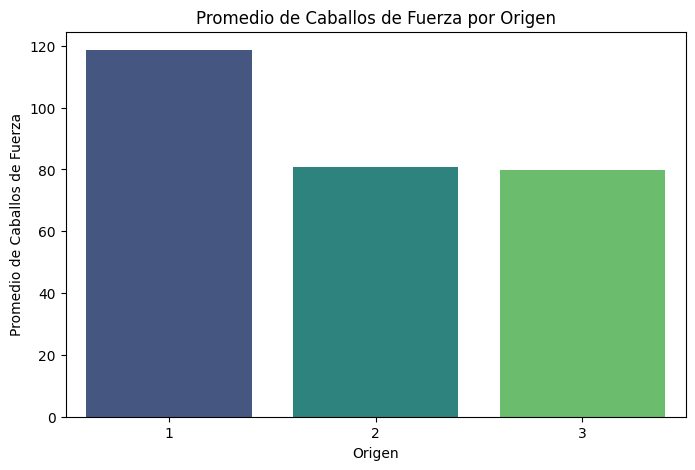

In [34]:
# Calcular el promedio de caballos de fuerza por origen
horsepower_by_origin = df1.groupby('origin')['horsepower'].mean()

# Gráfico de barras
plt.figure(figsize=(8, 5))
sns.barplot(x=horsepower_by_origin.index, y=horsepower_by_origin.values, palette='viridis')
plt.title('Promedio de Caballos de Fuerza por Origen')
plt.xlabel('Origen')
plt.ylabel('Promedio de Caballos de Fuerza')
plt.savefig(r'0-ComplementaryResourses\eda_mpg\reports\figures\barplot_horsepower_by_origin.png')
plt.show()


#### **Correlación entre peso y mpg**

Coeficiente de correlación: -0.831740933244335
Valor p: 2.9727995640497067e-103
Existe una correlación significativa entre el peso y el MPG.


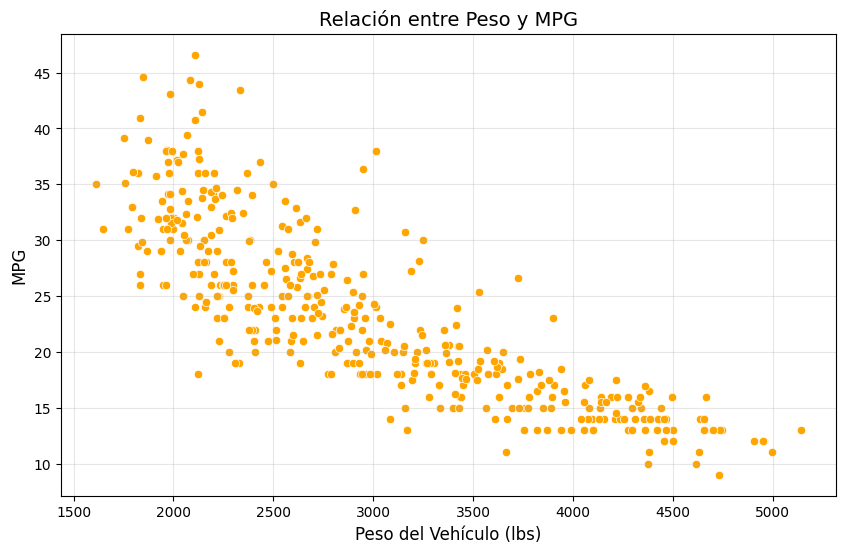

In [35]:
# Calcular la correlación de Pearson entre peso y mpg
corr, p_value = pearsonr(df1['weight'], df1['mpg'])

# Interpretar los resultados
print(f"Coeficiente de correlación: {corr}")
print(f"Valor p: {p_value}")

if p_value < 0.05:
    print("Existe una correlación significativa entre el peso y el MPG.")
else:
    print("No hay una correlación significativa entre el peso y el MPG.")

# Graficar la relación entre peso y mpg
plt.figure(figsize=(10, 6))
sns.scatterplot(x='weight', y='mpg', data=df1, color='orange')
plt.title('Relación entre Peso y MPG', fontsize=14)
plt.xlabel('Peso del Vehículo (lbs)', fontsize=12)
plt.ylabel('MPG', fontsize=12)
plt.grid(True, alpha=0.3)
plt.savefig(r'0-ComplementaryResourses\eda_mpg\reports\figures\scatterplot_weight_mpg.png')
plt.show()


#### **Relación entre los grupos de origen y los caballos de fuerza**
Queremos verificar si hay diferencias significativas en el promedio de caballos de fuerza entre los diferentes orígenes.

Estadístico F: 60.9087918692129
Valor p: 8.786447784674464e-24
Hay diferencias significativas en los caballos de fuerza promedio entre los diferentes orígenes.


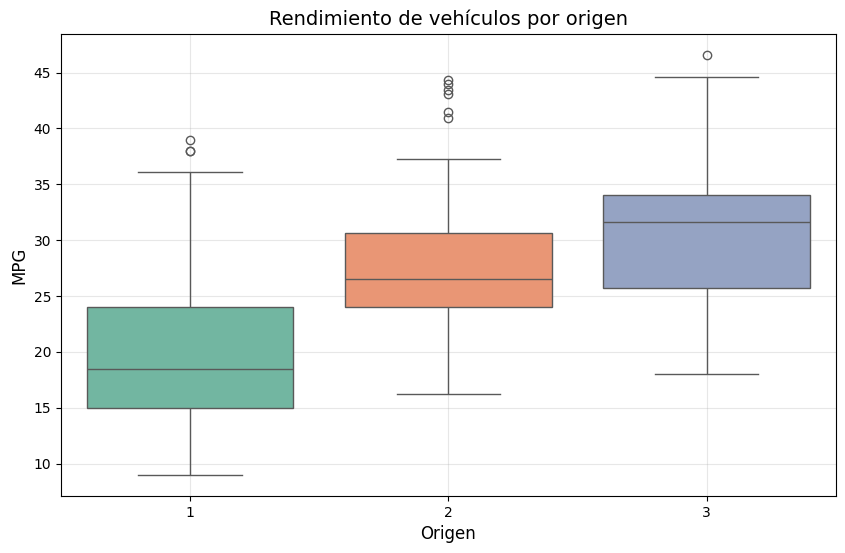

In [36]:
# Primero, agrupamos los datos por origen y extraemos los caballos de fuerza por cada origen
horsepower_by_origin_groups = [df1[df1['origin'] == origin]['horsepower'].dropna() for origin in df1['origin'].unique()]

# Realizamos una prueba ANOVA
f_stat, p_value = stats.f_oneway(*horsepower_by_origin_groups)

print(f"Estadístico F: {f_stat}")
print(f"Valor p: {p_value}")

# Interpretación
if p_value < 0.05:
    print("Hay diferencias significativas en los caballos de fuerza promedio entre los diferentes orígenes.")
else:
    print("No hay diferencias significativas en los caballos de fuerza promedio entre los diferentes orígenes.")

# Graficar los resultados
plt.figure(figsize=(10, 6))
sns.boxplot(x='origin', y='mpg', data=df1, palette='Set2')
plt.title('Rendimiento de vehículos por origen', fontsize=14)
plt.xlabel('Origen', fontsize=12)
plt.ylabel('MPG', fontsize=12)
plt.grid(True, alpha=0.3)
plt.savefig(r'0-ComplementaryResourses\eda_mpg\reports\figures\boxplot_origin_mpg.png')
plt.show()


#### **Distribución del MPG para vehículos con más de 6 cilindros**
¿Cómo se compara la distribución del MPG de vehículos con más de 6 cilindros con la del resto del dataset?  



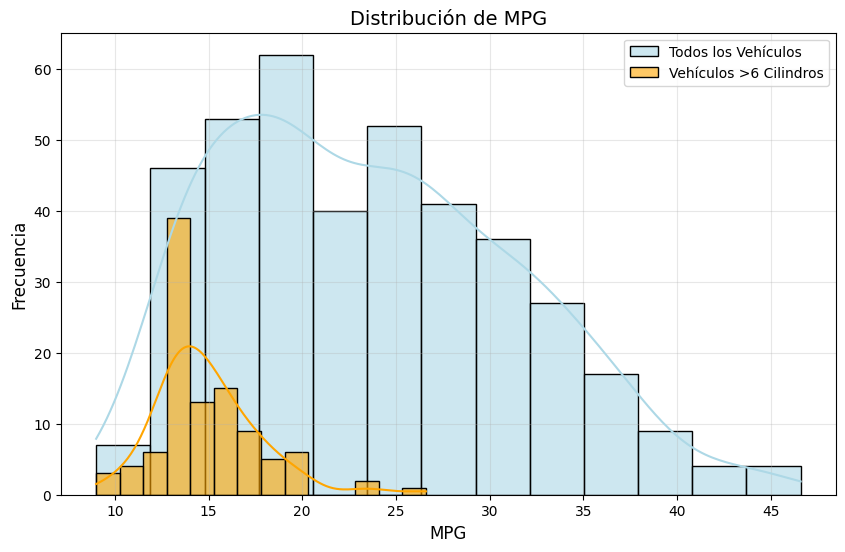

In [37]:
# Filtrar vehículos con más de 6 cilindros
mpg_over_6_cyl = df1[df1['cylinders'] > 6]['mpg']

# Gráfico de histogramas
plt.figure(figsize=(10, 6))
sns.histplot(df1['mpg'], kde=True, color='lightblue', label='Todos los Vehículos', alpha=0.6)
sns.histplot(mpg_over_6_cyl, kde=True, color='orange', label='Vehículos >6 Cilindros', alpha=0.6)
plt.title('Distribución de MPG', fontsize=14)
plt.xlabel('MPG', fontsize=12)
plt.ylabel('Frecuencia', fontsize=12)
plt.legend()
plt.grid(alpha=0.3)
plt.savefig(r'0-ComplementaryResourses\eda_mpg\reports\figures\histogram_mpg_over_6_cyl.png')
plt.show()


In [38]:
# Prueba de inferencia estadística (t-test para comparar medias)
t_stat, p_value = stats.ttest_ind(df1['mpg'], mpg_over_6_cyl.dropna())

print(f"Estadístico t: {t_stat}")
print(f"Valor p: {p_value}")

# Interpretación de la prueba
if p_value < 0.05:
    print("Hay una diferencia significativa en las medias de MPG entre los vehículos con más de 6 cilindros y todos los vehículos.")
else:
    print("No hay una diferencia significativa en las medias de MPG entre los vehículos con más de 6 cilindros y todos los vehículos.")

Estadístico t: 10.91259371398298
Valor p: 5.20379343746654e-25
Hay una diferencia significativa en las medias de MPG entre los vehículos con más de 6 cilindros y todos los vehículos.



#### **Evolución del peso de los vehículos a lo largo del tiempo**
¿Han cambiado los pesos de los vehículos a lo largo del tiempo?  



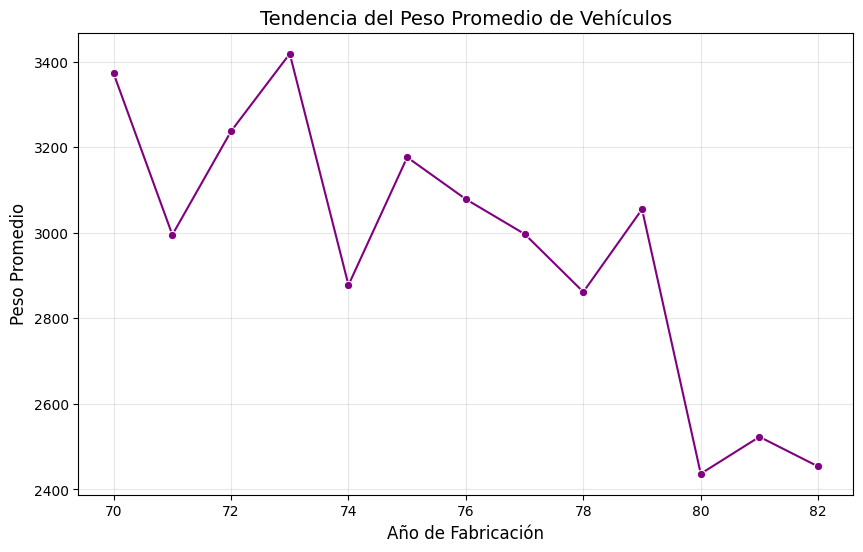

In [39]:
# Tendencia del peso por año
weight_trend = df1.groupby('model_year')['weight'].mean()

# Gráfico de líneas
plt.figure(figsize=(10, 6))
sns.lineplot(data=weight_trend, marker='o', color='purple')
plt.title('Tendencia del Peso Promedio de Vehículos', fontsize=14)
plt.xlabel('Año de Fabricación', fontsize=12)
plt.ylabel('Peso Promedio', fontsize=12)
plt.grid(alpha=0.3)
plt.savefig(r'0-ComplementaryResourses\eda_mpg\reports\figures\lineplot_weight_trend.png')
plt.show()


Este análisis examina cómo el peso de los vehículos ha cambiado con el tiempo, reflejando posibles cambios en diseño, materiales o estándares de fabricación.

#### **Relación entre el origen y MPG**

¿Cómo podrías comparar si el mpg promedio difiere entre los tres orígenes de los vehículos (origin) en el dataset mpg?

Hay una diferencia significativa en el MPG entre los vehículos de diferentes orígenes.


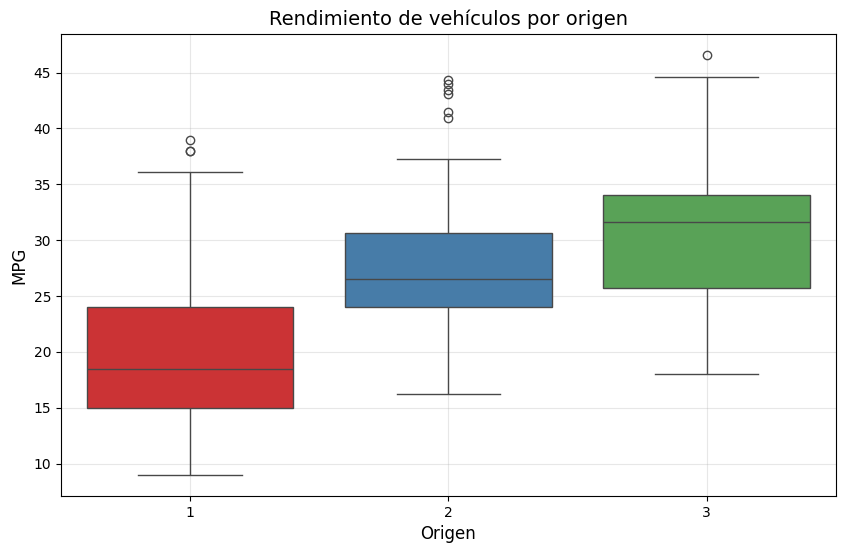

In [40]:
# Filtrar vehículos por origen
mpg_origin1 = df1[df1['origin'] == 1]['mpg']
mpg_origin2 = df1[df1['origin'] == 2]['mpg']
mpg_origin3 = df1[df1['origin'] == 3]['mpg']

# Realizar la prueba de Kruskal-Wallis
stat, p_value = kruskal(mpg_origin1, mpg_origin2, mpg_origin3)

# Interpretar los resultados
if p_value < 0.05:
    print("Hay una diferencia significativa en el MPG entre los vehículos de diferentes orígenes.")
else:
    print("No hay una diferencia significativa en el MPG entre los vehículos de diferentes orígenes.")

# Graficar los resultados
plt.figure(figsize=(10, 6))
sns.boxplot(x='origin', y='mpg', data=df1, palette='Set1')
plt.title('Rendimiento de vehículos por origen', fontsize=14)
plt.xlabel('Origen', fontsize=12)
plt.ylabel('MPG', fontsize=12)
plt.grid(True, alpha=0.3)
plt.savefig(r'0-ComplementaryResourses\eda_mpg\reports\figures\boxplot_origin_mpg.png')
plt.show()
